# Introduction

Word2vec is a technique in natural language processing for obtaining vector representations of words.

Word2vec represents a word as a high dimension vector of numbers which capture relationships between words. In particular, words which appear in similar context are mapped to vectors which are nearby as measured by cosine similarity.

#### Using `gensim.model` to train a word2vec model

In [2]:
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing dataset (text8)

In [8]:
with open("../data/raw/text8.txt", "r") as f:
    text = f.read()

words = text.split()

Word2Vec works better with sentence (continous word) input, but Text8 doesn't have any sentences. Therefore splitting every N words

In [9]:
def chunk_words(words, chunk_size=1000):
    for i in range(0, len(words), chunk_size):
        yield words[i: i + chunk_size]

sentences = list(chunk_words(words))
print(len(sentences))

17006


#### Training the word2vec model

In [12]:
w2v = Word2Vec(
    sentences=sentences,
    vector_size=100,        # embedding dimensions
    window=5,               # context window size
    workers=4,              # parallel threads
    epochs=10,              # number of training iteration over the corpus
    min_count=5             # ignore rare words
)

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_fl

#### Exploring trained W2V model

In [20]:
# get numpy record of a word
vector = w2v.wv['king']
print(vector)

[-2.75226879e+00  3.79363084e+00  1.55577719e-01  1.73352087e+00
 -2.29891106e-01  2.05389667e+00  2.10991576e-02  2.65011358e+00
  8.67651924e-02  2.08348274e+00 -7.66143739e-01 -1.08680809e+00
  3.14642358e+00  3.45876431e+00 -4.93802834e+00  1.75207651e+00
  2.21270204e+00  9.81826484e-01  3.16940117e+00  1.52820432e+00
  5.10824323e-01 -6.33293509e-01 -9.63607311e-01 -1.02079105e+00
  1.53058851e+00 -2.02691536e-02  1.72670543e+00  2.38606334e+00
  8.36054832e-02 -3.84304500e+00  8.90462399e-01  6.40269220e-01
 -2.03483796e+00 -2.22800612e+00  7.25740850e-01  5.23369312e-01
  1.76916647e+00  7.72032857e-01 -1.03560209e+00 -6.68845415e-01
  2.53270626e+00 -1.14080322e+00 -1.09793878e+00 -1.31871426e+00
 -6.52471364e-01 -1.26372159e+00  5.46802580e-01  6.90655351e-01
  2.37293053e+00 -2.81874824e+00  3.83651066e+00  9.11978066e-01
 -1.37090087e+00 -2.01810265e+00 -1.00858676e+00 -4.17301089e-01
 -1.86094010e+00  1.61807728e+00 -6.02988541e-01 -3.05436635e+00
  1.60780036e+00  3.23502

In [21]:
# get other words
sims = w2v.wv.most_similar('king', topn=10)
print(sims)

[('prince', 0.7035337090492249), ('regent', 0.6811946034431458), ('throne', 0.6691842675209045), ('emperor', 0.6669443249702454), ('kings', 0.6616082787513733), ('queen', 0.6470451951026917), ('darius', 0.6355639100074768), ('tiglath', 0.630938708782196), ('sultan', 0.629522442817688), ('aragon', 0.6292422413825989)]


In [22]:
w2v.wv.similarity("king", "queen")

np.float32(0.64704514)

In [23]:
w2v.wv.similarity("king", "prince")

np.float32(0.70353377)

In [24]:
w2v.wv.similarity("king", "cup")

np.float32(0.12511875)

In [25]:
# odd one out
w2v.wv.doesnt_match(["king", "queen", "teddy"])

'teddy'

In [26]:
from sklearn.decomposition import PCA

This function is copied from Standford Gensim word vector visualization of various word vectors then edited to work with Gensim 4.x versions

[link](https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html)

In [31]:
def display_pca_scatterplot(model, words=None, sample=0):
    # model is a Word2Vec instance
    # get vocab keys using gensim API
    vocab_words = list(model.wv.key_to_index.keys())

    if words is None:
        if sample > 0:
            words = np.random.choice(vocab_words, sample)
        else:
            words = vocab_words

    # fetch vectors using model.wv
    word_vectors = np.array([model.wv[w] for w in words])

    twodim = PCA(n_components=2).fit_transform(word_vectors)

    plt.figure(figsize=(8,8))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')

    for word, (x, y) in zip(words, twodim):
        plt.text(x+0.03, y+0.03, word)

    plt.show()

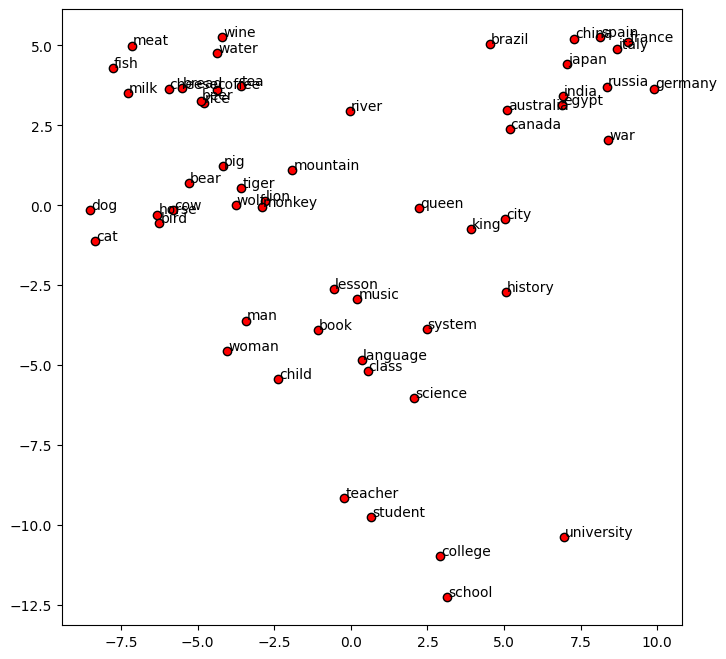

In [33]:
text8_words = [
    # countries
    "france", "germany", "china", "india", "japan",
    "canada", "russia", "italy", "spain", "brazil",
    "australia", "egypt",

    # animals
    "dog", "cat", "horse", "cow", "lion",
    "tiger", "bear", "wolf", "pig", "bird",
    "fish", "monkey",

    # foods
    "bread", "rice", "cheese", "milk", "water",
    "coffee", "tea", "wine", "beer", "meat",

    # education
    "school", "college", "university", "student",
    "teacher", "class", "lesson", "book",

    # general concepts
    "king", "queen", "man", "woman", "child",
    "city", "river", "mountain", "war", "music",
    "language", "history", "science", "system"
]

display_pca_scatterplot(w2v, text8_words)